In [5]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV, train_test_split, KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from database_conn import Database_conn
db = Database_conn()

In [6]:
table_in = '"L1_AMZN"'

df_ta = db.sql_to_df(table_in)

df_plot = df_ta.drop('id', axis = 1)
df_plot = df_plot.reset_index(drop=True)
df_plot['signal'] = df_plot['signal'].astype(int)
df_plot.dtypes


c:\Users\mschulze\source\repos\personal\stock_trading-1\database_conn.py:197: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, self.conn)


timestamp        datetime64[ns]
open                    float64
high                    float64
low                     float64
close                   float64
volume                  float64
sma30                   float64
sma50                   float64
rstd                    float64
upper_band              float64
lower_band              float64
rsi_12                  float64
srsi_12                 float64
sosc                    float64
trix_12                 float64
rsi_14                  float64
srsi_14                 float64
trix_14                 float64
rsi_16                  float64
srsi_16                 float64
trix_16                 float64
rsi_18                  float64
srsi_18                 float64
trix_18                 float64
macd_24                 float64
mi_24                   float64
macd_26                 float64
mi_26                   float64
macd_28                 float64
mi_28                   float64
macd_30                 float64
mi_30   

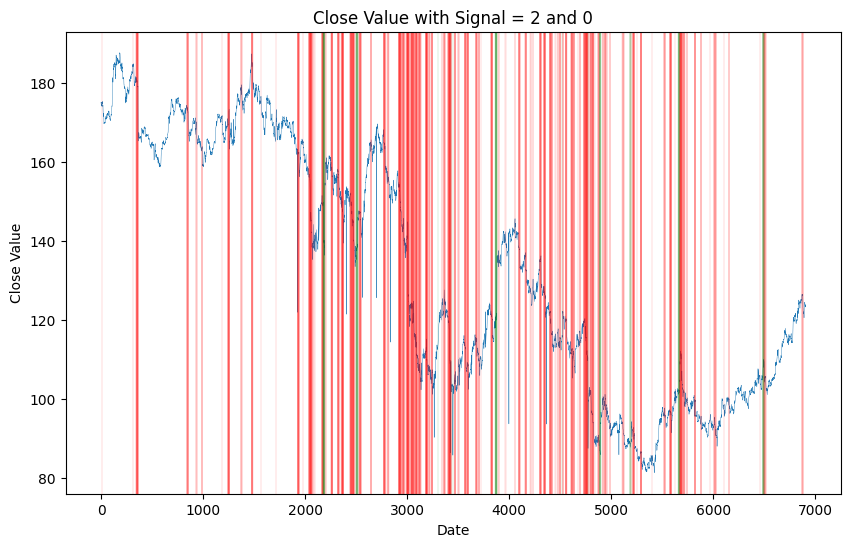

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

# create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 6))

# plot the last 500 Close values
df_plot.iloc[-10000:, 3].plot(ax=ax, linewidth  = 0.3)

# loop through the index of the last 500 data points and plot a vertical line for every datapoint where the signal equals 2
for index in df_plot.iloc[-10000:, :].index:
    if df_plot.loc[index, 'signal'] == 2:
        ax.axvline(x=index, color='g', linestyle='-', linewidth=0.1)
    elif df_plot.loc[index, 'signal'] == 0:
        ax.axvline(x=index, color='r', linestyle='-', linewidth=0.1)

# set the title and labels
ax.set_title('Close Value with Signal = 2 and 0')
ax.set_xlabel('Date')
ax.set_ylabel('Close Value')

# display the plot
plt.show()


In [8]:
df_val = df_ta.head(500).copy()
df_ta = df_ta.iloc[500:]

df_ta = df_ta.drop('id',axis = 1)
df_ta = df_ta.drop('timestamp',axis = 1)
df_ta = df_ta.loc[:, ~df_ta.columns.str.contains('pct_change')]
df_ta_features = df_ta.drop('signal', axis = 1)


df_ta_features

,open,high,low,close,volume,sma30,sma50,rstd,upper_band,lower_band,...,srsi_18,trix_18,macd_24,mi_24,macd_26,mi_26,macd_28,mi_28,macd_30,mi_30
500,164.97,165.20,164.89,164.94,1886840.0,164.71,164.93,0.30,165.53,164.33,...,0.83,-0.01,0.00,25.00,-0.01,25.00,-0.03,25.00,-0.05,24.99
501,164.94,165.63,164.94,165.63,2483820.0,164.76,164.93,0.33,165.59,164.26,...,1.00,-0.01,0.06,25.01,0.04,25.00,0.03,25.00,0.01,25.00
502,165.62,165.73,165.12,165.14,6241420.0,164.78,164.91,0.34,165.59,164.24,...,0.76,-0.01,0.07,25.01,0.06,25.01,0.04,25.00,0.02,25.00
503,165.18,165.18,165.00,165.10,1558140.0,164.80,164.90,0.34,165.57,164.22,...,0.74,0.00,0.08,25.01,0.06,25.01,0.05,25.01,0.03,25.00
504,165.28,165.30,164.30,164.68,7712620.0,164.95,164.77,0.35,165.46,164.08,...,0.00,0.00,0.06,25.01,0.06,25.01,0.06,25.01,0.05,25.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6900,123.76,123.90,123.47,123.84,3075555.0,122.69,123.36,1.39,126.14,120.58,...,0.54,0.01,0.41,25.05,0.39,25.04,0.36,25.03,0.32,25.02
6901,123.84,124.28,123.84,123.90,2232625.0,122.77,123.32,1.38,126.07,120.56,...,0.54,0.01,0.37,25.06,0.36,25.06,0.34,25.05,0.31,25.03
6902,123.90,124.15,123.35,123.86,2459620.0,122.86,123.25,1.36,125.98,120.52,...,0.45,0.02,0.34,25.07,0.33,25.06,0.31,25.06,0.29,25.05
6903,123.85,124.35,123.80,124.22,5796998.0,122.96,123.20,1.35,125.90,120.50,...,0.55,0.02,0.33,25.07,0.33,25.07,0.31,25.07,0.29,25.06


In [9]:
# Create a StandardScaler object
scaler = StandardScaler()

# Apply the scaler to the entire DataFrame
df_ta_features = scaler.fit_transform(df_ta_features)
df_ta_features

array([[ 1.18184627,  1.17298213,  1.19655678, ...,  0.02537726,
        -0.0301609 , -0.04511316],
       [ 1.18083452,  1.1874791 ,  1.19824383, ...,  0.02537726,
         0.06040665,  0.02635599],
       [ 1.20376754,  1.19085049,  1.20431721, ...,  0.02537726,
         0.07550124,  0.02635599],
       ...,
       [-0.20324072, -0.21097249, -0.20504348, ...,  0.50344009,
         0.48305524,  0.38370173],
       [-0.20492697, -0.20422971, -0.18986004, ...,  0.58311723,
         0.48305524,  0.45517087],
       [-0.19143696, -0.20591541, -0.18311184, ...,  0.66279437,
         0.49814983,  0.52664002]])

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    df_ta_features,  # features
    df_ta['signal'],  # target variable
    test_size=0.2,
    random_state=42,
    )   

X_test

array([[ 0.33669701,  0.3203582 ,  0.30208343, ..., -0.61203985,
        -0.76979593, -0.68833548],
       [-1.19104686, -1.20586898, -1.1916297 , ...,  0.66279437,
         0.37739309,  0.66957832],
       [ 0.84864297,  0.8648373 ,  0.86319591, ...,  0.26440868,
         0.61890657,  0.24076343],
       ...,
       [-0.47472721, -0.48270633, -0.46316197, ..., -0.05429988,
        -0.39243112,  0.02635599],
       [-1.27535943, -1.28880511, -1.27733179, ..., -0.29333129,
        -0.25657979, -0.33098974],
       [-1.29019844, -1.29386219, -1.27665697, ..., -0.37300843,
        -0.67922838, -0.33098974]])

In [11]:


# Create a random forest classifier object
rfc = RandomForestClassifier()

# Define the hyperparameters to search over
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a GridSearchCV object
cv = KFold(n_splits=10, shuffle=True, random_state=42)
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=cv)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print('Best hyperparameters:', grid_search.best_params_)

# Get the best model
best_model = grid_search.best_estimator_

# Fit the best model to the training data
best_model.fit(X_train, y_train)


Best hyperparameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


RandomForestClassifier(max_depth=20, n_estimators=50)

In [12]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

# Get the predicted classes for the test data
y_pred = best_model.predict(X_test)

# Calculate the accuracy of the model
f1score = f1_score(y_test, y_pred, average='weighted')

# Print the accuracy of the model
print('F1_score:', f1score)

F1_score: 0.9287811559370526


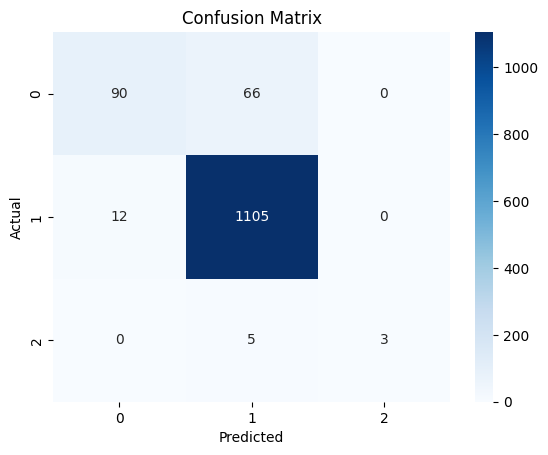

In [13]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Get the predicted classes for the test data
y_pred = best_model.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Set the axis labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Show the plot
plt.show()


In [14]:
df_val = df_val.drop('id',axis = 1)
df_val = df_val.drop('timestamp',axis = 1)
df_val = df_val.loc[:, ~df_val.columns.str.contains('pct_change')]
df_val_features = df_val.drop('signal', axis = 1)

# Create a StandardScaler object
scaler = StandardScaler()

# Apply the scaler to the entire DataFrame
df_val_features = scaler.fit_transform(df_val_features)

In [15]:
X_val, y_val,  = df_val_features, df_val['signal'],  # target variable

X_val

array([[-0.09267875, -0.03009272, -0.04521482, ...,  1.03050378,
         0.70165257,  1.04508341],
       [-0.03529166, -0.07034961, -0.09755989, ...,  1.03050378,
         0.6382636 ,  1.04508341],
       [-0.12907057, -0.16613324, -0.17112594, ...,  1.03050378,
         0.52733289,  1.04508341],
       ...,
       [-1.5707463 , -1.59039422, -1.5646366 , ..., -0.0229417 ,
        -0.04316789, -0.01226524],
       [-1.58194378, -1.55846634, -1.54058616, ..., -0.0229417 ,
        -0.04316789, -0.01226524],
       [-1.57494535, -1.55707817, -1.53209777, ...,  0.0941078 ,
        -0.0114734 , -0.01226524]])

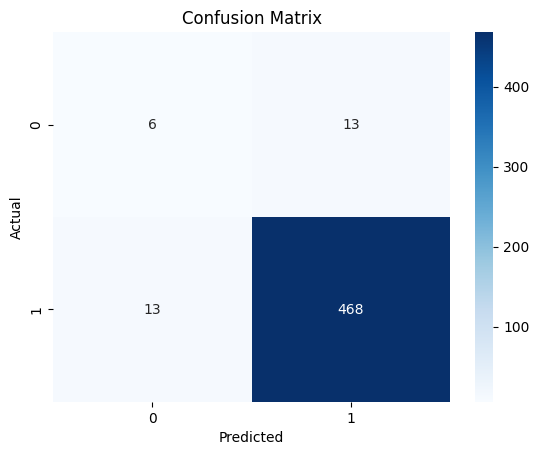

In [16]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Get the predicted classes for the test data
y_pred = best_model.predict(X_val)

# Create the confusion matrix
cm = confusion_matrix(y_val, y_pred)

# Create a heatmap for the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Set the axis labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

In [26]:
table_in = '"L1_AMZN"'

df_ta = db.sql_to_df(table_in)
df_ta = df_ta.tail()

df_ta = df_ta.drop('id',axis = 1)
df_ta = df_ta.drop('timestamp',axis = 1)
df_ta = df_ta.loc[:, ~df_ta.columns.str.contains('pct_change')]
df_ta = df_ta.drop('signal', axis = 1)

# Create a StandardScaler object
scaler = StandardScaler()

# Apply the scaler to the entire DataFrame
df_ta_scaled = scaler.fit_transform(df_ta)

y_pred = best_model.predict(df_ta_scaled)
print(y_pred)

# Convert the scaled DataFrame back to a regular DataFrame
df_ta = pd.DataFrame(df_ta_scaled, columns=df_ta.columns)

# Create a new column 'Prediction' and assign the predicted values to it
df_ta['Prediction'] = y_pred
print(df_ta)




c:\Users\mschulze\source\repos\personal\stock_trading-1\database_conn.py:197: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, self.conn)


['1' '0' '1' '1' '1']
       open      high       low     close    volume     sma30     sma50  \
0 -0.935689 -1.826465 -0.914456 -0.942117  0.081430 -1.366684  1.380902   
1 -0.467844  0.518321  0.609637 -0.634905 -0.462647 -0.745464  0.839372   
2 -0.116961 -0.283842 -1.408756 -0.839713 -0.316131 -0.046591 -0.108306   
3 -0.409364  0.950255  0.444870  1.003559  1.838009  0.729933 -0.785219   
4  1.929858  0.641731  1.268704  1.413175 -1.140662  1.428806 -1.326749   

       rstd  upper_band  lower_band  ...   trix_18   macd_24     mi_24  \
0  1.401826    1.411478    1.401826  ... -1.224745  1.757550 -1.568929   
1  0.862662    0.769897    0.862662  ... -1.224745  0.455661 -0.588348   
2 -0.215666   -0.054993   -0.215666  ...  0.816497 -0.520756  0.392232   
3 -0.754829   -0.788228   -0.754829  ...  0.816497 -0.846228  0.392232   
4 -1.293993   -1.338155   -1.293993  ...  0.816497 -0.846228  1.372813   

   macd_26     mi_26   macd_28     mi_28   macd_30     mi_30  Prediction  
0     1

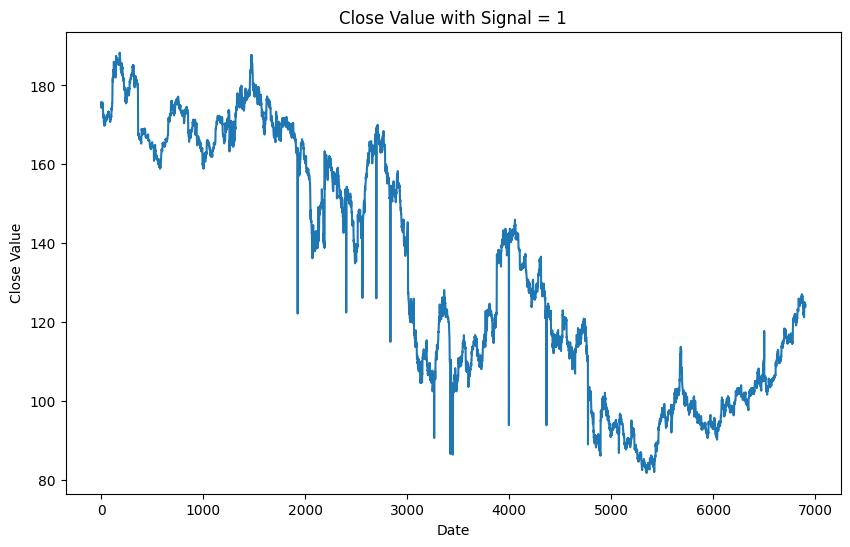

In [19]:
import matplotlib.pyplot as plt
import pandas as pd

# reset the index of the dataframe
df_ta.reset_index(drop=True)


# convert the 'index' column to numeric data type
#df_ta['index'] = pd.to_numeric(df_ta['index'])

# create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 6))

# plot the Close value
df_ta['close'].plot(ax=ax)

# loop through the rows of the dataframe and plot a vertical line for every datapoint where the signal equals 1
for index, row in df_ta.iterrows():
    if row['signal'] == 1:
        ax.axvline(x=row['index'], color='r', linestyle='--')

# set the title and labels
ax.set_title('Close Value with Signal = 1')
ax.set_xlabel('Date')
ax.set_ylabel('Close Value')

# display the plot
plt.show()


In [ ]:
df_ta


,open,high,low,close,volume,sma30,sma50,rstd,upper_band,lower_band,...,pct_change_21,pct_change_22,pct_change_23,pct_change_24,pct_change_25,pct_change_26,pct_change_27,pct_change_28,pct_change_29,signal
500,160.21,160.34,159.97,159.99,3754120.0,160.28,160.91,0.79,162.48,159.34,...,0.00,0.00,0.00,-0.01,-0.01,0.00,0.00,0.00,0.00,1
501,159.30,159.74,159.12,159.71,4532700.0,160.17,160.81,0.78,162.37,159.26,...,0.00,-0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1
502,159.74,159.98,159.60,159.94,2916500.0,160.13,160.77,0.75,162.27,159.28,...,-0.01,-0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1
503,159.97,160.00,159.16,159.32,7833080.0,160.06,160.72,0.72,162.16,159.28,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1
504,160.10,160.35,159.80,160.00,509360.0,159.85,159.98,0.73,161.45,158.51,...,0.01,0.00,0.01,0.00,0.00,0.00,0.01,0.02,0.02,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5725,101.37,101.97,101.35,101.89,4137159.0,98.89,99.15,1.41,101.97,96.32,...,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,1
5726,101.89,102.57,101.89,102.34,4747548.0,99.04,99.20,1.53,102.26,96.13,...,0.00,0.00,0.00,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,1
5727,102.35,102.42,101.98,102.00,3633320.0,99.18,99.24,1.61,102.45,96.02,...,0.00,0.01,0.00,0.00,0.00,0.00,0.00,-0.01,0.00,1
5728,102.00,102.41,101.90,102.39,3715219.0,99.34,99.28,1.68,102.65,95.92,...,0.00,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,1
